<a href="https://colab.research.google.com/github/jeftersantiago/intro_ciencia_de_dados/blob/master/Tarefa%2003%20-%20Modelos%20de%20regressao/Tarefa_03_Modelos_de_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercicio 1
Para os dados gerados pelo código abaixo, ajuste um modelo de regressão polinomial considerando um polinômio de grau 3 e 5. Qual oferece o melhor ajuste em termos do coeficiente rR2?

In [610]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from statsmodels.formula.api import ols

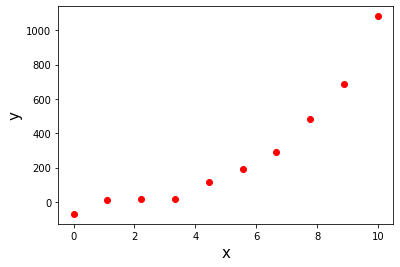

In [611]:
N = 10
x = np.linspace(0,10,N)
y = x**3 + np.random.normal(0,50, N)
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.show(True)

In [612]:
def transformX(degree, x):
  transformer = PolynomialFeatures(degree=degree, include_bias=False)
  x = x.reshape((-1, 1))
  transformer.fit(x)
  return transformer.transform(x)

X3 = transformX(3, x)
X5 = transformX(5, x)

In [613]:
model = LinearRegression().fit(X3, y)
y_pred3 = model.predict(X3)
model = LinearRegression().fit(X5, y)
y_pred5 = model.predict(X5)

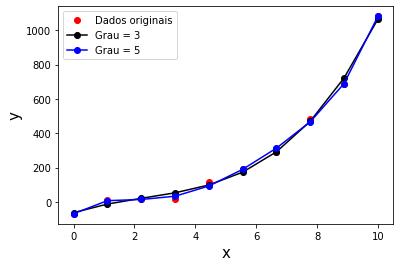

In [614]:
plt.plot(x,y, 'ro', label='Dados originais')

plt.plot(x,y_pred3, 'bo-', label = 'Grau = 3', color="black")
plt.plot(x,y_pred5, 'bo-', label = 'Grau = 5', color="blue")

plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.legend()
plt.show()

In [615]:
R2_degree3 = r2_score(y, y_pred3)
print('R2 [Grau = 3]:', R2_degree3)
R2_degree4 = r2_score(y, y_pred4)
print('R2 [Grau = 4]:', R2_degree4)
R2_degree5 = r2_score(y, y_pred5)
print('R2 [Grau = 5]:', R2_degree5)

R2 [Grau = 3]: 0.9962114262737517
R2 [Grau = 4]: 0.9686348890049477
R2 [Grau = 5]: 0.9986644238864266


O modelo com grau 5 tem um coeficiente $R2$ mais próximo de 1, então é o que ofece melhor ajuste.

# Exercicio 2
Ajuste um modelo e realize a inferência para a base de casas de Boston. Faça o diagnóstico e verifique se o modelo é adequado.



In [616]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/data/BostonHousing.csv", header=(0))
ylabel = data.columns[-1]
data = data.to_numpy()
nrow, ncol =  data.shape

X = data[:,0:ncol-1]
Y = data[:,-1]

Fazendo ajuste dos coeficientes da regressão linear usando o conjunto de treinamento.

In [617]:
p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

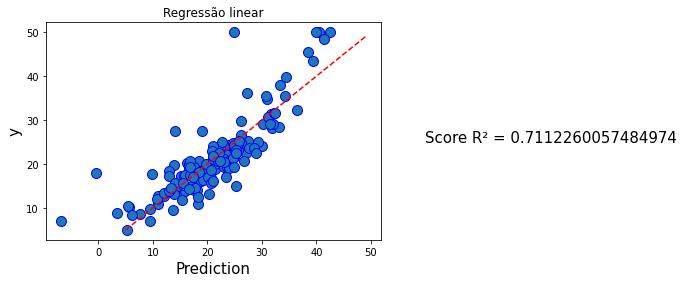

In [618]:
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')

plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

R2 = r2_score(y_test, y_pred)
string = "Score R² = " + str(R2)

plt.text(60, 25, string, fontsize = 15)
plt.title("Regressão linear")

xl = np.arange(min(y_test), max(y_test))
yl = xl
plt.plot(xl, yl, 'r--')
  
plt.show()

In [619]:
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7112260057484974


## Testando regressão polinomial multivariada


In [620]:
def polynomialRegressionMultivariable(X, Y, degree):
  poly = PolynomialFeatures(degree=degree)
  poly_variables = poly.fit_transform(X)

  poly_x = poly.fit_transform(X)

  poly_x_train, poly_x_test, y_train, y_test = train_test_split(poly_x, Y, test_size = p, random_state = 33)

  regression = LinearRegression()

  model = regression.fit(poly_x_train, y_train)

  y_pred = model.predict(poly_x_test)
  return y_pred, y_test

In [621]:
def plotRegressionModel(y_pred, y_test):

  fig = plt.figure()
  l = plt.plot(y_pred, y_test, 'bo')

  plt.setp(l, markersize=10)
  plt.setp(l, markerfacecolor='C0')

  plt.ylabel("y", fontsize=15)
  plt.xlabel("Prediction", fontsize=15)


  plt.title("Regressão linear")

  xl = np.arange(min(y_test), max(y_test))
  yl = xl
  plt.plot(xl, yl, 'r--')

  plt.show()

  R2 = r2_score(y_test, y_pred)
  string = "Score R² = " + str(R2)
  print(string)

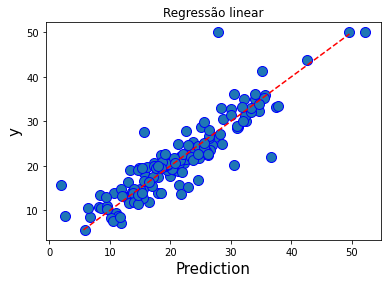

Score R² = 0.7945918258329278


In [622]:
y_pred, y_test = polynomialRegressionMultivariable(X, Y, 2)
plotRegressionModel(y_pred, y_test)

Foi feita a inferência de que os parametros tinham uma relação quadrática, a partir disso foi feito o modelo de regressão polinômial quadrático afim de comparar os scores $R²$ do modelo de regressão linear e o polinômial. Nota-se que o modelo quadrático tem um score mais alto, então é mais adequado que o outro. Além disso também foi testado para polinômios de graus maiores, os quais não apresentaram valores $R^2$ válidos.

## Diagnóstico


Média dos reíduos =  0.09328030128228046


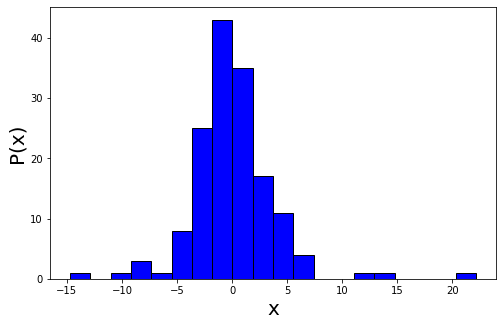

In [623]:
residuals =  (y_test - y_pred)

print("Média dos reíduos = ", np.mean(residuals))

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=20, color = 'blue', histtype='bar', ec='black')  
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)',fontsize = 20)

plt.show()

Nota-se que a média dos resíduos é bem próxima de zero além de a distribuição ser bem aproximada com uma distribuição normal.


# Exercicio 3
Ajuste um modelo para a base de dados de propagandas (Advertising.csv) e faça a inferência. Todas as variáveis são importantes para o ajuste ou alguma delas pode ser descartada?



In [624]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/data/Advertising.csv", header=(0))
# data = data.drop('radio', axis=1)

Afim de entender se todas variáveis são importantes para o ajuste fazemos a matriz de covariância e para varáveis muito correlacionadas nós descartamos da analise e então cálculamos o PCA, essas variáveis serão as utilizadas no modelo de regressão.

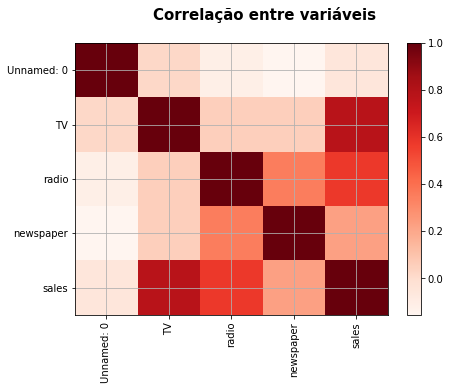

In [625]:
corr = data.corr()

plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap = 'Reds', interpolation = 'none', aspect = 'auto')

plt.xticks(range(len(corr)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle("Correlação entre variáveis", fontsize = 15, fontweight = 'bold')

plt.colorbar()
plt.grid()
plt.show()

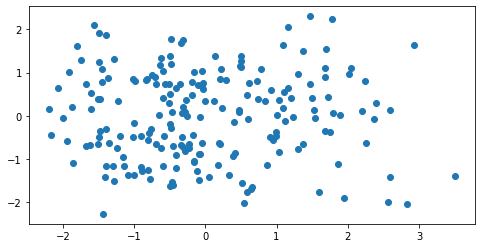

In [626]:
data = data.to_numpy()
nrow, ncol =  data.shape

X = data[:,0:ncol-1]
Y = data[:,-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

pca = PCA(n_components = 2)

pca_result = pca.fit_transform(X)

plt.figure(figsize=(8, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.show()

É então perceptivel que as variáveis não possuem correlações muito fortes, portanto não podemos descartar variáveis menos importantes no modelo de regressão

## Montando o modelo de regressão linear para a base de dados Advertising

Testando inicialmente um modelo de regressão linear.

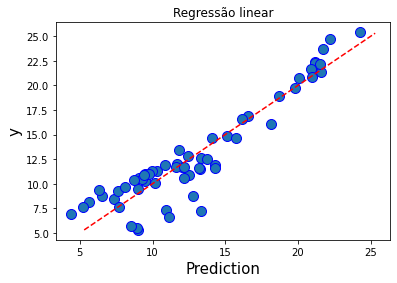

Score R² = 0.8609155416329135


In [627]:
X = data[:,0:ncol-1]
Y = data[:,-1]

p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)


plotRegressionModel(y_pred, y_test)

Testando para o caso de regressão polinômial de grau 2

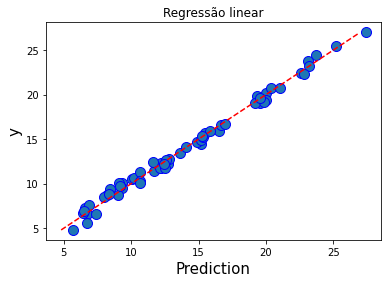

Score R² = 0.9915429694918896


In [628]:
y_pred, y_test = polynomialRegressionMultivariable(X, Y, 2)
plotRegressionModel(y_pred, y_test)

Como já foi evidenciado pela matriz de correlação e o PCA, **todas variáveis** são importantes para o modelo, portanto nenhuma pode ser desconsiderada. No entanto algumas variáveis são importantes que outras, como consta no gráfico de correlações, ao se remover variáveis com cores mais escuras a relação linear pior que com a retirada das outras.

O modelo mais adequado para essa regresão é a polinômial de grau = 2.